# Team Mathilde - Project Report

# Introduction to the solution algorithm

We have implemented SciPy's solve_ivp function utilising the RK45 time stepping method. We have utilised solve_svp's optional **event** function. This uses a root finding algorithm to identify the occurance and time that certain "event" functions return true. These events being initation of fracture $(v^2 \rho a > \sigma  _0 )$ and asteroid impact $(z <= 0)$ . <br> <br>
If and when the fracture condition is met, the solver switches to a new and different system function that includes the $\dfrac{dr}{dt}$ differential equation. This new system is solved through until the $(z <= 0)$ "event" occurs. The results from both sets of integration are compiled returning the time series and solutions for $ v, m, \theta, z\ and\  x$. 

---

# Software Usage:
-  As an **installable package**: <br>

    -  To add install the packge to your python packages run the following command in terminal in the directory containing "setup.py": <br> ** "$ python setup.py install" **  
    -  This will allow you to utilise the python modules contained within the /MeteorPackage directory without being located in our file directory.  <br> <br>
    
-  As a **command line programme** run on **start.py**

---

Running: ** $ python start.py -h **
 <pre>
`start.py [-h] [-p DENSITY] [-z ALTITUDE] [-g GRAVITY] [-o RHO] <br>
         [-s SIGMA0] [-t PA_TAB] [-l PLANET] [-x PLOT] [-y RESULTS] <br>
         v m theta r <br>
positional arguments:<br>
  v                     Initial velcoity <br>
  m                     Initial mass <br>
  theta                 Initial Asteroid trajectory angle <br>
  r                     Initial Asteroid radius <br>
optional arguments:<br>
  -h, --help            show this help message and exit<br>
  -p DENSITY, --density DENSITY<br>
                        Asteroid Density<br>
  -z ALTITUDE, --altitude ALTITUDE<br>
                        Initial Altitude<br>
  -g GRAVITY, --gravity GRAVITY<br>
                        Gravity<br>
  -o RHO, --rho RHO     planetry Radius<br>
  -s SIGMA0, --sigma0 SIGMA0<br>
                        Asteroid Material strength<br>
  -t PA_TAB, --pa_tab PA_TAB<br>
                        Tabulated atmospheric data, filename<br>
  -l PLANET, --planet PLANET, <br> Specify a planet<br>
  -x PLOT, --plot PLOT  Plot the results for specified parameters, default=True<br>
  -y RESULTS, --results RESULTS<br>
                        Give results for meteorite impact model, default=True<br>`
</pre>
---

# The  meteor class: 
The meteor class contains the core functionalities of our software <br> 
input arguments as follows:
<br>
-  _Required parameters: ( **v** = velocity, **m** = mass, **theta** = meteorite entry angle, **r** = meteorite radius)_ <br>
-  Optional parameters: (z0 = initial altitude, g = gravitional acceleration, Rp = planetry radius, sigma0 =  material strength of asteroid, pa_tab=False, planet='Earth' )

#### pa_tab parameter:
-  Allows for user input of tabulated atmospheric pressure data files **or** an atmospheric input function <br>
-  If not specified an exponential function is assumed, as defualt representing Earths atmosphere
-  If specified a cubic spline is fitted to the tabulated data and used for solving the system

#### Planet parameter:
-  Provides a quick way to specify gravitational accelaration, planetry radius and atmospheric pressure function for Earth or Mars. 
-  If not specified Earth is set as defalt.
-  If specific g, rp or pa_tab(atmospheric tabular data) are specified, these override the specific Earth or Mars cases.

## Class methods:
**meteor.fire():**
-  This method creates the data from running the solver. 
-  A user can use this method to return: time, yfinal, ablated, t_events
    -  time = an array of the time values
    -  yfinal = a list of arrays with v, m, theta, x, r data respectively
    -  ablated = Bool denoting whether ablation occurs
    -  t_events = to lists with a single value denoting time at ablation initiation and impact respectively

**meteor.plot():**
-  This method created two seperate pop up plots first containing plots of: altitude vs time; speed vs altitude; mass vs. altitude; diameter vs. altitude. The second kinetic energy loss per km vs. altitude.
-  If called with .plot(save=True) the method will save the plots as .png files to your directory <br>

**meteor.results():**
-  Provides readout of key results of the model: 
    -  Whether the scenario is an airburst or a cratering event
    -  The peak kinetic energy loss per km (airburst)
    -  The burst altitude (airburst)
    -  The total kinetic energy loss at burst (airburst)
    -  The mass and speed of the remnants of the asteroid that strike(s) the ground (airburst and cratering) <br>

**meteor.analytical():**
-  Provides functionality to return an symplistic analytal solution
    - returns a list of arrays containing analytical solutions for variables; velocity, trajectory angle, altitude and downrage distance of the asteroid.

In [24]:
# For the demonstration in this notebook we run the commands as if located within the software diectory
%reset -f
import meteor

Airbust event occured at   8.01 seconds
Debris field touchdown at   8.01 seconds
Debris field was 7207.33 tons and was travelling at  22.14
maximum energy loss was 8726.84 kt/km at  24.51 KM


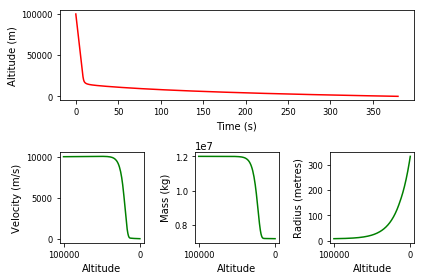

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


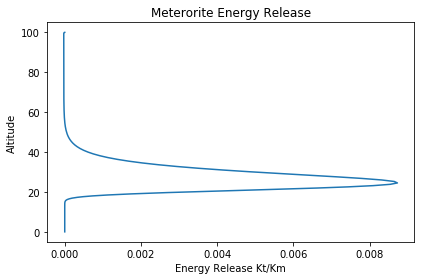

In [27]:
# creating an instance of the class:
mathilde = meteor.meteor(v=10E3, m=12000E3, theta=20, r=8, z0=100E3, g=9.81, Rp=6400E3, sigma0=4E6, pa_tab=False, planet="Earth")
#returning key results:
mathilde.results()
#plot key results:
mathilde.plot()

# Comparison between numerical and analytical solutions
### Conditions
In the given condition below, we make a comparison between the numerical and analytical solutions:
- Exponential atmosphere ($\rho_a = \rho_0 e^{-z/H}$), 
- No gravitational acceleration ($g=0$), 
- A flat planet ($R_p = \infty$), 
- No lift ($C_L = 0$), 
- No mass change owing to ablation ($\frac{dm}{dt}=0$) 
- No fragmentation ($\sigma_0 = \infty$, $\frac{dr}{dt}=0$)


### System Equations

Under the conditions above, the system equations are reduced to the following:

\begin{cases}
\begin{aligned} 
\cfrac{dv}{dt} & = \frac{-C_D\rho_a A v^2}{2 m}\\
\cfrac{dm}{dt} & = 0\\
\cfrac{d\theta}{dt} & = 0\\
\cfrac{dz}{dt} & = -v\sin\theta\\
\cfrac{dx}{dt} & = v\cos\theta
\end{aligned}
\end{cases}

For the analytical solution，we mainly focus on the velocity and altitude. So finally there are 2 equations to solve:

\begin{cases}
\cfrac{dv}{dt} & = \cfrac{-C_D\rho_a A v^2}{2 m}\\
\\
\cfrac{dz}{dt} & = -v\sin\theta\\
\end{cases}

The atomsphere is assumed to follow the exponential: $\rho_a = \rho_0 e^{-z/H}$. To express the function compactly, $K = \cfrac{-C_D\rho_a A }{2 m}$ we then derive the relation between $v$ and $z$
\begin{aligned}
\frac{dv}{dz} & = \frac{dv}{dt}\frac{dt}{dz} \\
\\
\Rightarrow\frac{dv}{dz} = -Ke^{-z/H}v^2&\frac{1}{v\sin\theta} = -\frac{K}{\sin\theta}e^{-z/H}v\\
\\
\Rightarrow\frac{1}{v}dv = &-\frac{K}{\sin\theta}e^{-z/H}dz\\
\\
\Rightarrow\int {\frac{1}{v}} \,{\rm d}v = &\int {-\frac{K}{\sin\theta}e^{-z/H}} \,{\rm d}z + C
\\
\\
\Rightarrow\ln{v} = &\frac{KH}{\sin\theta}e^{-z/H}+C
\end{aligned}

Using the initial values $v(0)=v_0$, $z(0)=z_0$, we calculate the value of the constant $C$ and arrive at the final function.

\begin{aligned}
\ln{v} = &-\cfrac{C_D\rho_a A H}{2m\sin\theta}e^{-z/H}+C
\end{aligned}


## Results:

<img src="images/compare_num&ana.png" width="640">

The figure above shows the comparison results.
We use solve_ivp(RK45) as the numerical method and modify the radius of the asteroid to generate different cases.
This shows that our numerical method provides accurate quilitative approximation of the analytical solution for various cases.
<img src="images/absolute_error.png" width="640"><img src="images/Relative_Errors.png" width="640">
<img src="images/error_altitude_v.png" width="640"><img src="images/error_altitude_z.png" width="640">
Although the absolute errors grow with time, it converges to a low value. As for the relative errors, the maximum is less than 0.1%. So the accuracy of the numerical method ivp is quite reliable under the given conditions.

# Error Plot quantification

The main mathematical component of the meteor package relies on the scipy.odeint.solve_ivp numerical solver, running an RK45 difference method. Solve_ivp RK45 uses adaptive timestepping; as a result a comparison of timestep with the resultant errors produced would not be appropriate due to the uncertainty of only being able to set an maximum timestep constraint. The relative solver tolerance was varied and compared to the relative global error in meteor impact time. This was found by observing the convergence of the solver at small tolerances. From this we infer that the solution is stable and that at very small tolerances we may assume the numerical solution to be ideal, given the solvers accuracy in the verifiable simple case outlined in 4. <br>

We then plot the relative errors for both impact and non impact scenarios against relative tolerance. Upon observation it is clear that the errors follow a general trend, as demonstrated by the line of best fit. However the data are clearly noisey. This may be as a result of extraneous code altering the results post solve, or as a result of the solve_ivp choosing non ideal timesteps at which to evaluate the process.

<img src="images/nonfractureerror.png" width="640">

#  A comparison assessment to the Chelyabinsk impact.

The meteor package was used to produce a value of the size and strength of the Chelyabinsk meteor by comparison of the kinetic energy loss functions. As may be seen from the set of differential equations displayed above, the main solver ODEs do not contain a hard constraint on the initial geometry of the meteor. Prior to meteor fracture, the meteor radius (and so cross sectional area,) and density all remain constant under change of mass. We may interpret this as defining the meteor as an elongated cylinder, where the mass due to ablation is lost from the bottom dimension of the cylinder, as a result of the meteors unconstrained height. To produce an accurate size of the meteor, we introduce a hard initial constraint on the initial meteor mass:
\begin{equation*}
\frac{4}{3} \pi r^{3} \rho_{m} = m
\end{equation*}
Where we can trivially observe that the initial meteor geometry is spherical. <br>
Introducing the Chelyabinsk initial parameters from literature, we run the simulation with _parameters_ = (**v** = 19.13e3, **z0** = 97e3, **x** = 0, **theta** = 18.3). We then optimise to find $r = 8.43$m and $\sigma_0 = 4.1 \times 10^{6}$Pa.
Comparing these values to literature we find tentitative agreement: Popova _et al_ 2013 report $r = (9.9 \pm 2.3)$m in experimental agreement with our calculated radius.

<img src="images/chebalynsk.pdf" width="640">

# Mars vs Earth impact scenario:

-  Our meteor class has a simple parameter allowing the user to specify Mars impact conditions

-  A as default the conditions are set to model an impact on earth

The figure below demonstrates how the different gravitational and atmospheric conditions cause a much lower burst altitude when compared with earth.

<img src="images/compare_planets_altitude_vs_energy_release.png" width="640">


In [28]:
mathilde2earth = meteor.meteor(v=10E3, m=1200E3, theta=20, r=30, z0=100E3, g=9.81, Rp=6400E3, sigma0=64*1E3, pa_tab=False, planet="Earth")
mathilde2mars = meteor.meteor(v=10E3, m=1200E3, theta=20, r=30, z0=100E3, g=9.81, Rp=6400E3, sigma0=64*1E3, pa_tab=False, planet="Mars")

print("Model predictions for asteroid hitting Earth:")
mathilde2earth.results()
#mathilde2earth.plot()

print("Model predictions for asteroid hitting Mars:")
mathilde2mars.results()
#mathilde2mars.plot()

Model predictions for asteroid hitting Earth:
Airbust event occured at   4.36 seconds
Debris field touchdown at   4.36 seconds
Debris field was 720.73 tons and was travelling at   5.68
maximum energy loss was 651.26 kt/km at  39.68 KM
Model predictions for asteroid hitting Mars:
Airbust event occured at   6.76 seconds
Debris field touchdown at   6.76 seconds
Debris field was 752.82 tons and was travelling at 2737.22
maximum energy loss was 414.65 kt/km at  14.37 KM


# A demonstration of an alternative or more complex fragmentation model via a graphical comparison between two models

-  Our FCM_meteor class can demonstrate an alternative model of fragmentation, named Fragment-cloud Model([Wheeler et al. 2017](http://doi.org/10.1016/j.icarus.2017.02.011)).

-  The radius of the spreading cloud is regarded as the asteroid radius when spreading in the original model

-  Our FCM_meteor class use different equations for time-derivatives of flight angle,mass and radius

Figures below demonstrate a graphical comparison between two models

<img src="images/compare_models_altitude_vs_energy_release.png" width="640">

<img src="images/compare_models_altitude_vs_time.png" width="640">

<img src="images/compare_models_mass_vs_altitude.png" width="640">

<img src="images/compare_models_radius_vs_altitude.png" width="640">

<img src="images/compare_models_velocity_vs_altitude.png" width="640">


In [30]:
import meteor_FCM

mathilde1 = meteor.meteor(v=10E3, m=1200E3, theta=20, r=30, z0=100E3, g=9.81, Rp=6400E3, sigma0=64*1E3, pa_tab=False, planet="Earth")
mathilde2 = meteor_FCM.meteorFCM(v=10E3, m=1200E3, theta=20, r=30, g0=9.81, P=64*1E3,Rp=6400E3)

print('The result of original model is:')
mathilde1.results()
print('\n')
print('The result of alternative model(Fragment-cloud Model) is:')
mathilde2.results()

The result of original model is:
Airbust event occured at   4.36 seconds
Debris field touchdown at   4.36 seconds
Debris field was 720.73 tons and was travelling at   5.68
maximum energy loss was 651.26 kt/km at  39.68 KM


The result of alternative model(Fragment-cloud Model) is:
Airbust event occured at   5.40 seconds
Debris field touchdown at 154.70 seconds
Debris field was 720.86 tons and was travelling at  65.06
maximum energy loss was   0.89 kt/km at  25.99 KM


# Statistical ensemble evaluations

We have created functionality to run a set of statistical evaluations on through our model. This was implemented via a non-invasive statistical modelling. These features are available within the “sta.py” python file.

**Inputs:**
-  Normal distribtuions of velocity and radius

$ v  \sim \mathcal{N}(\mu,\,\sigma^{2})\,. $ <br>
$ r  \sim \mathcal{N}(\mu,\,\sigma^{2})\,. $

**outputs:**
-  Normal distributions of <br>

$  peak energy \ (kt/km)  \sim \mathcal{N}(\mu,\,\sigma^{2})\,. $ <br>
$ Altitude at peak energy  \sim \mathcal{N}(\mu,\,\sigma^{2})\,.$ <br>

---

Running the simulation with a range of mu and sigma for both v and r revealed some key characteristics.
-  Peak energy was far more senstive to parameters than peak energy altitude.
-  Regardless of the mean and SD for both v and r the Altitude mean returned values around 30 km with a SD 0.26
-  It is likely this feature is due to the atmospheric density profle, further tests running the simulation with different atmospheric densities would be a key area for further study. <br>

<img src="images/max_energyloss.png" width=“640”>

<img src="images/distri_altitude.png" width=“640”>